Good Reads

Goodreads Books Review Rating Prediction
Reviews are a good way to judge the quality of any product, whether it's books, clothes, technology, or anything else. When you want to buy something online these days, the first thing that comes to mind is the reviews from past buyers and the overall rating the product has received.
Reader feedback, whether positive or negative, five stars or one star, will encourage the product owner to make improvements.
Reader connection and engagement will be encouraged by book reviews, whether they be left on Amazon, Goodreads, or social media. Readers must determine whether or not other readers are enjoying the book.

In this competition you will work with a challenging dataset consisting reviews from the Goodreads book review website, and a variety of attributes describing the items. and you have to predict review rating which ranges from 0 to 5.

In [252]:
#pip install nltk
#pip install spacy
# pip install textblob

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, f1_score
from textblob import TextBlob #sentiment anlysis library
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer #another sentiment analysis library
#import spacy #another sentiment analysis library
from sklearn.feature_extraction.text import TfidfVectorizer #the following 4 libraries are for a customize model of sentiment with sklearn
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from keras.preprocessing.text import Tokenizer #the following 4 libraries are for a customize model of sentiment with deep learning: keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.utils.np_utils import to_categorical
import tensorflow as tf # This library is for a customize model of sentiement with deep learning: Tensor flow
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt



In [23]:
# Load the data
path = ".\goodreads-books-reviews-290312\goodreads_train_sample.csv"
df = pd.read_csv(path)
print (df.shape)
df.head()

(90000, 12)


,Unnamed: 0,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,898402,ed556b92506c3452b42fffed31697a1a,25125233,182718faad99666b70f73f3b7ffbbdb7,3,Jessica Broussard has only ever had her father...,Thu Nov 19 07:48:55 -0800 2015,Thu Nov 19 11:31:55 -0800 2015,Wed Nov 18 00:00:00 -0800 2015,Tue Nov 17 00:00:00 -0800 2015,0,0
1,853518,fcf6bca39e8f5333ba018b0e146ccfec,6837103,228c47ca18ed4c1598ae3c9214530b6b,5,"Set in the late 1700s and early 1800s, the sto...",Tue Dec 06 13:19:29 -0800 2011,Mon Dec 19 11:28:19 -0800 2011,Mon Dec 19 00:00:00 -0800 2011,Tue Dec 06 00:00:00 -0800 2011,0,0
2,366741,b8f6f163c2161555c6d887632b2ff4a2,17948485,6137b1fe0159b7eaa56a04293a00fd49,5,This book is the bomb! Love every single page ...,Fri Jul 26 17:43:19 -0700 2013,Sat Aug 10 20:06:19 -0700 2013,Sat Jul 27 00:00:00 -0700 2013,Fri Jul 26 00:00:00 -0700 2013,0,0
3,476233,33162c8e64b16bcbddc9808f3c716342,18405,c5b3dc0c0416d850380d80f5304be91f,5,Wherein I attempt to write a review using all ...,Wed Jun 30 08:01:44 -0700 2010,Tue Dec 31 06:07:21 -0800 2013,Fri Feb 18 00:00:00 -0800 2011,Sat Feb 12 00:00:00 -0800 2011,46,14
4,856723,37d8353490e210e2b3766336be99ebd4,26218626,234b51de9a79dfd51b5dc2b48df972ec,3,I can't believe I have only one volume left. T...,Wed Jun 29 19:48:42 -0700 2016,Thu Mar 30 07:18:31 -0700 2017,Thu Mar 30 07:18:31 -0700 2017,Thu Mar 30 00:00:00 -0700 2017,0,0


In [197]:
df = df.drop(["Unnamed: 0"], axis=1) #this just when I upload the sample of 10% of data

In [198]:
#Check type var
df.dtypes

user_id         object
book_id          int64
review_id       object
rating           int64
review_text     object
date_added      object
date_updated    object
read_at         object
started_at      object
n_votes          int64
n_comments       int64
dtype: object

In [199]:
df.count()

user_id         900000
book_id         900000
review_id       900000
rating          900000
review_text     900000
date_added      900000
date_updated    900000
read_at         808234
started_at      625703
n_votes         900000
n_comments      900000
dtype: int64

In [200]:
df.isna().sum(axis = 0)

user_id              0
book_id              0
review_id            0
rating               0
review_text          0
date_added           0
date_updated         0
read_at          91766
started_at      274297
n_votes              0
n_comments           0
dtype: int64

In [201]:
df = df.dropna()

In [202]:
df.describe(include='all')

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
count,615507,6.155070e+05,615507,615507.000000,615507,615507,615507,615507,615507,615507.000000,615507.000000
unique,11610,NaN,615507,NaN,609939,613502,605825,261654,37628,NaN,NaN
top,843a44e2499ba9362b47a089b0b0ce75,NaN,dfdbb7b0eb5a7e4c26d59a937e2e5feb,NaN,Review to come.,Wed Jul 14 21:11:00 -0700 2010,Mon Sep 23 05:22:17 -0700 2013,Fri Jan 01 00:00:00 -0800 2016,Fri Jan 01 00:00:00 -0800 2016,NaN,NaN
freq,1506,NaN,1,NaN,440,13,27,432,827,NaN,NaN
mean,NaN,1.454812e+07,NaN,3.800428,NaN,NaN,NaN,NaN,NaN,3.716936,1.152703
std,NaN,9.177933e+06,NaN,1.123173,NaN,NaN,NaN,NaN,NaN,18.148401,6.106695
min,NaN,1.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,-3.000000,-1.000000
25%,NaN,7.735333e+06,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,1.574919e+07,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,NaN,2.185362e+07,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000


Sentiment analysis 1: Textblob <br>
In this code, we use the pandas library to read the book review data into a dataframe, and the TextBlob library to perform sentiment analysis. We apply the sentiment analysis to each review in the "review" column of the dataframe and store the results in a new column with the sentiment called 'review_text_textblob'. The polarity score of each review ranges from -1 (most negative) to 1 (most positive). <br>
if you're using TextBlob for sentiment analysis, the model might use a pre-trained classifier or a dataset of annotated texts to determine the sentiment of a given review text. In this case, the training data for the sentiment analysis classifier could come from a variety of sources, such as movie reviews, product reviews, etc.

In [203]:
# Create a new column in the dataframe to store the sentiment scores
df['review_text_textblob'] = df['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity) #it takes 14 minutes with the completed data

C:\Users\edofa\AppData\Local\Temp\ipykernel_24444\2307057653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text_textblob'] = df['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity) #it takes 14 minutes with the completed data


Sentiment Analysis 2: Nltk <br>
In this code, we use the pandas library to read the book review data into a dataframe, and the SentimentIntensityAnalyzer from the nltk library to perform sentiment analysis. We apply the sentiment analysis to each review in the "review" column of the dataframe and store the results in a new column with the sentiment called 'review_text_nltk'. The polarity score of each review ranges from -1 (most negative) to 1 (most positive). <br>
 NLTK does provide some pretrained models, it's not a single pretrained model, but rather a collection of models, algorithms, and resources that can be used for NLP tasks.

In [204]:
# Initialize the SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\edofa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [205]:
# Create a new column in the dataframe to store the sentiment scores
df['review_text_nltk'] = df['review_text'].apply(lambda x: sia.polarity_scores(x)['compound']) #it takes 17 min with the completed data

C:\Users\edofa\AppData\Local\Temp\ipykernel_24444\2154696478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text_nltk'] = df['review_text'].apply(lambda x: sia.polarity_scores(x)['compound']) #it takes 2 min with the sample data


Sentiment Analysis 3: Spacy <br>
In this code, we use the pandas library to read the book review data into a dataframe, and the spacy library to perform sentiment analysis. We apply the sentiment analysis to each review in the "review" column of the dataframe and store the results in a new column called "sentiment". The sentiment score of each review is either 1 (positive) or -1 (negative).

In [206]:
# Load the English language model
#nlp = spacy.load("en_core_web_sm")

In [207]:
# Create a function to get the sentiment score of a review
#def get_sentiment(review):
    #doc = nlp(review)
    #if doc.cats['POSITIVE'] > doc.cats['NEGATIVE']:
        #return 1
    #else:
        #return -1

In [208]:
# Create a new column in the dataframe to store the sentiment scores
#df['review_text_spacy'] = df['review_text'].apply(lambda x: get_sentiment(x))

Sentiment analysis 4: Customize model with sklearn <br>

In this code, we use the pandas library to read the book review data into a dataframe and split it into training and testing sets.

Next, we use the TfidfVectorizer from scikit-learn to convert the text data into numerical features using the Tf-idf representation.

We then train a linear support vector machine (SVM) classifier using the LinearSVC class from scikit-learn on the training data.

We use the trained model to make predictions on the test data and evaluate its accuracy using the accuracy_score function from scikit-learn.

Finally, we add the prediction results as a new column in the dataframe using df.loc[] to assign the values only for the rows in the test data.


In [209]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review_text'], df['rating'], test_size=0.3)

In [210]:
# Convert the text data into numerical features using Tf-idf
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

In [211]:
# Train a linear support vector machine (SVM) classifier
clf = LinearSVC()
clf.fit(X_train_features, y_train)

LinearSVC()

In [212]:
# Make predictions on the test data
y_pred = clf.predict(X_test_features)

In [213]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5238366016257521


In [214]:
# Add the prediction results as a new column in the dataframe
df['review_text_sktlearn'] = np.nan
df.loc[X_test.index, 'review_text_sktlearn'] = y_pred

C:\Users\edofa\AppData\Local\Temp\ipykernel_24444\2629232593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text_sktlearn'] = np.nan


Sentiment analysis 5: Keras <br>

Here's a step-by-step explanation of the process for training a multi-class sentiment analysis model in Keras to predict the rating of a book review:

Load the data: The first step is to load the book review data into a pandas dataframe. In this example, the data is loaded from a CSV file using the read_csv function.

Preprocess the text data: The next step is to preprocess the text data. To do this, we use the Tokenizer class from Keras. We first fit the tokenizer on the text data, which creates a vocabulary of the most common words in the text. Then, we use the tokenizer to convert the text data into numerical sequences, where each word is represented by its index in the vocabulary. Finally, we use the pad_sequences function from Keras to pad the sequences to a fixed length of 100.

Convert the rating data into categorical labels: We convert the rating data into categorical labels using the to_categorical function from Keras. This function converts the rating data into a one-hot encoded representation, where each rating is represented as a vector of 6 elements with a 1 in the index corresponding to the rating and 0s in all other elements.

Split the data into training and testing sets: We split the preprocessed data into training and testing sets using the train_test_split function from scikit-learn. This function splits the data into two sets, one for training the model and one for evaluating its performance.

Define the model architecture: We define the model architecture using the Sequential model from Keras. We add an Embedding layer, which maps the word indices to dense vectors of fixed size. The dense vectors are used as input to the next layer. We add a GRU (Gated Recurrent Unit) layer, which is a type of recurrent neural network that processes sequences of input data. The GRU layer allows the model to take into account the context and dependencies between words in the review. Finally, we add a Dense layer with a softmax activation function, which outputs the probability of each rating class.

Compile the model: We compile the model using the compile method and specify the loss function, optimizer, and evaluation metrics. The loss function measures the difference between the predicted and actual ratings. The optimizer updates the model weights to minimize the loss. The evaluation metrics measure the performance of the model.

Train the model: We train the model using the fit method. The model is trained on the training data, and the model weights are updated to minimize the loss function. The model is trained for 10 epochs, where an epoch is one pass over the training data. The batch size is set to 32, which means that the model updates its weights after processing 32 reviews at a time.

Evaluate the model: Finally, we evaluate the model on the test data using the evaluate method. The evaluate method returns the loss and accuracy of the model on the test data.

By following these steps, we can train a multi-class sentiment analysis model in Keras to predict the rating of a book review based on its text.


In [215]:
# Preprocess the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['review_text'])
X = tokenizer.texts_to_sequences(df['review_text'])
X = pad_sequences(X, maxlen=100)

In [216]:
# Convert the rating data into categorical labels
y = to_categorical(df['rating'], num_classes=6)

In [217]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [218]:
# Define the model architecture
model = Sequential()
model.add(Embedding(5000, 128, input_length=100))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))

In [219]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [220]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test)) #it takes 200 min for the completed


Epoch 1/10
13465/13465 [==============================] - 1174s 87ms/step - loss: 1.0427 - accuracy: 0.5478 - val_loss: 0.9758 - val_accuracy: 0.5768
Epoch 2/10
13465/13465 [==============================] - 1203s 89ms/step - loss: 0.9558 - accuracy: 0.5874 - val_loss: 0.9550 - val_accuracy: 0.5883
Epoch 3/10
13465/13465 [==============================] - 1189s 88ms/step - loss: 0.9231 - accuracy: 0.6023 - val_loss: 0.9512 - val_accuracy: 0.5877
Epoch 4/10
13465/13465 [==============================] - 1196s 89ms/step - loss: 0.8997 - accuracy: 0.6130 - val_loss: 0.9482 - val_accuracy: 0.5879
Epoch 5/10
13465/13465 [==============================] - 1189s 88ms/step - loss: 0.8814 - accuracy: 0.6212 - val_loss: 0.9482 - val_accuracy: 0.5904
Epoch 6/10
13465/13465 [==============================] - 1216s 90ms/step - loss: 0.8680 - accuracy: 0.6284 - val_loss: 0.9540 - val_accuracy: 0.5895
Epoch 7/10
13465/13465 [==============================] - 1215s 90ms/step - loss: 0.8563 - accuracy:

In [221]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

5771/5771 [==============================] - 78s 14ms/step - loss: 0.9731 - accuracy: 0.5818
Test accuracy: 0.5818264484405518


It can be observed that the accuracy does not improve to much regard to sklearn model (for completed data improve from 0.52 to 0.58)

In [222]:
# Create a predict function
def predict(model, x_test):
    predictions = model.predict(x_test)
    predicted_classes = np.argmax(predictions, axis=1)
    return predicted_classes

In [223]:
# Predict the sentiment for each review
y_pred = predict(model, X)

In [224]:
# Create a new column in the dataframe with the predicted sentiments
df['review_text_keras'] = y_pred


C:\Users\edofa\AppData\Local\Temp\ipykernel_24444\1708802160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text_keras'] = y_pred


Sentiment analysis 5: Tensorflow <br>
here's a more detailed explanation of the TensorFlow model: <br>

1:Import the TensorFlow library:<br>
2:Define the model architecture using the Sequential model: <br>
This code creates a model with 3 layers: <br>

The Embedding layer takes the input data, which is a numerical representation of the book reviews, and maps each word to a dense vector of fixed size. The input_dim parameter specifies the size of the vocabulary (i.e. the number of unique words in the data), output_dim is the size of the dense vector representation, and input_length is the maximum length of the reviews. <br>

The LSTM (Long-Short Term Memory) layer is a type of recurrent neural network layer that is commonly used for sequence data, such as text data. This layer processes the sequences and generates an output representation that summarizes the input sequence. The number 32 represents the number of units in the LSTM layer. <br>

The Dense layer is a fully connected layer that takes the output of the LSTM layer and produces 6 output units, each corresponding to a rating class. The softmax activation function is used to ensure that the outputs are probabilities that sum up to 1, so that they can be interpreted as class probabilities.<br>
3: Compile the model:<br>
The compile method configures the model for training. The loss function is set to sparse_categorical_crossentropy, which is a loss function that is suitable for multi-class classification problems. The optimizer is set to adam, which is a popular optimization algorithm for deep learning models. The metrics argument is set to accuracy, which tells the model to report the accuracy of the predictions during training.<br>
4: Train the model:<br>
The fit method trains the model on the training data X_train and y_train. The epochs parameter specifies the number of times the model will see the entire training data (10 in this case). The batch_size parameter specifies the number of samples per gradient update (32 in this case). The validation_data argument provides the validation data X_val and y_val to evaluate the model after each epoch.<br>

Once the model is trained, the predictions can be obtained using the predict method, as explained in the previous answer

In [225]:
# Preprocess the data
reviews = df['review_text'].values
labels = df['rating'].values

# Calculate the vocab size
vocab = set()
for review in reviews:
    words = review.split()
    for word in words:
        vocab.add(word)
vocab_size = len(vocab)

In a natural language processing (NLP) task, the vocab_size is the size of the vocabulary used in the input text data. The vocabulary is a set of unique words in the input text. In the case of sentiment analysis, vocab_size is the number of unique words in the input reviews.

In the code, vocab_size is used as the input dimension of the Embedding layer in the neural network model. The Embedding layer is used to convert the input words into a dense vector representation, which can be fed into other layers in the network.

To define the vocab_size, you need to calculate the size of the vocabulary in the input text data.

In this code, reviews is a list of the reviews in the dataframe, and vocab is a set that contains all the unique words in the reviews. The size of vocab is calculated using the len() function, and it is stored in vocab_size.

In [226]:
# Calculate the max length
max_length = 0
for review in reviews:
    words = review.split()
    length = len(words)
    if length > max_length:
        max_length = length
print(length)

163


In a natural language processing (NLP) task, max_length refers to the maximum length of the input sequences, such as sentences or documents. In the case of sentiment analysis, max_length is the maximum number of words in a review.

The max_length is used to pad or truncate the input sequences to a fixed length, so that all the input sequences have the same length and can be processed by the neural network.

To define the max_length, you need to calculate the length of the longest review in your data.

In this code, reviews is a list of the reviews in the dataframe, and max_length is initialized to 0. The length of each review is calculated using the len() function, and the longest review is stored in max_length.

In [227]:
# Tokenize the reviews
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)
reviews = tokenizer.texts_to_sequences(reviews)

In [228]:
# Pad or truncate the reviews to have a length of 100
reviews = pad_sequences(reviews, maxlen=100)

In [229]:
## Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=100,
                    input_length=100))
model.add(LSTM(64))
model.add(Dense(6, activation='softmax'))

In [230]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [231]:
# Fit the model
history = model.fit(reviews, labels, epochs=10, batch_size=32) #It takes 957 minutes for completed data

Epoch 1/10
19235/19235 [==============================] - 5663s 294ms/step - loss: 1.0361 - accuracy: 0.5516
Epoch 2/10
19235/19235 [==============================] - 5782s 301ms/step - loss: 0.9055 - accuracy: 0.6134
Epoch 3/10
19235/19235 [==============================] - 5674s 295ms/step - loss: 0.8105 - accuracy: 0.6631
Epoch 4/10
19235/19235 [==============================] - 5662s 294ms/step - loss: 0.7018 - accuracy: 0.7158
Epoch 5/10
19235/19235 [==============================] - 5679s 295ms/step - loss: 0.5951 - accuracy: 0.7645
Epoch 6/10
19235/19235 [==============================] - 5654s 294ms/step - loss: 0.5014 - accuracy: 0.8040
Epoch 7/10
19235/19235 [==============================] - 5813s 302ms/step - loss: 0.4249 - accuracy: 0.8358
Epoch 8/10
19235/19235 [==============================] - 5998s 312ms/step - loss: 0.3638 - accuracy: 0.8607
Epoch 9/10
19235/19235 [==============================] - 5831s 303ms/step - loss: 0.3161 - accuracy: 0.8798
Epoch 10/10
19235/1

It reached a accuracy of 0.8955. which is de higher. <br>

In this code, the input reviews are first tokenized using the Tokenizer class from the tensorflow.keras.preprocessing.text module. The reviews are then converted to sequences of integers using the texts_to_sequences method. Finally, the input sequences are padded or truncated to have a length of 100 using the pad_sequences function. <br>

The model consists of an Embedding layer, an LSTM layer, and a Dense layer with 6 units and a softmax activation function. The model is compiled using the adam optimizer, sparse_categorical_crossentropy loss function, and accuracy as the evaluation metric. Finally, the model is trained on the input data for 10 epochs with a batch size of 32.

In [232]:
# Use the model to make predictions
predictions = model.predict(reviews)

# Convert the predictions to class labels
predicted_classes = tf.argmax(predictions, axis=1)

# Add the predictions to a new column in the dataframe
df['review_text_tf'] = predicted_classes.numpy()


C:\Users\edofa\AppData\Local\Temp\ipykernel_24444\1851679411.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text_tf'] = predicted_classes.numpy()


Note: Keras is a high-level API for building deep learning models that runs on top of TensorFlow. <br>

When you build a deep learning model using Keras, you are actually building a TensorFlow model, but with a more user-friendly API. In other words, Keras provides a simpler way to create TensorFlow models. This is why the code mentioned tf.keras API, which is a TensorFlow implementation of the Keras API.

In [233]:
# Now we check out all the sentiment models into de dataset
df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,review_text_textblob,review_text_nltk,review_text_sktlearn,review_text_keras,review_text_tf
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,0.176222,0.7820,4.0,4,5
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0,0.187156,0.9041,NaN,5,3
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1,0.191298,0.9942,NaN,4,4
5,8842281e1d1347389f2ab93d60773d4d,19398490,ea4a220b10e6b5c796dae0e3b970aff1,4,A beautiful story. It is rare to encounter a b...,Sun Jan 03 21:20:46 -0800 2016,Tue Sep 20 23:30:15 -0700 2016,Tue Sep 13 11:51:51 -0700 2016,Sat Aug 20 07:03:03 -0700 2016,35,5,0.108333,0.5238,NaN,4,4
6,8842281e1d1347389f2ab93d60773d4d,22318578,5fe9882bfe4b0520a322820c4c55747d,5,5 stars for giving me a better framework for h...,Sun Jun 07 12:50:13 -0700 2015,Wed Mar 22 11:36:58 -0700 2017,Sun Aug 09 00:00:00 -0700 2015,Sun Jun 07 00:00:00 -0700 2015,24,3,0.500000,0.8516,4.0,5,5


In [234]:
#Matriz de correlaciones
corrMatrix = df.corr() #Genereamos una matriz de correlaciones entre todas las variables
corrMatrix.style.background_gradient(cmap='coolwarm')

,book_id,rating,n_votes,n_comments,review_text_textblob,review_text_nltk,review_text_sktlearn,review_text_keras,review_text_tf
book_id,1.000000,0.032398,0.080987,0.029116,0.021702,0.050687,0.036035,0.040664,0.033670
rating,0.032398,1.000000,0.021954,0.009302,0.283397,0.245600,0.585701,0.740872,0.932705
n_votes,0.080987,0.021954,1.000000,0.649478,-0.022054,0.012510,0.026351,0.022989,0.020503
n_comments,0.029116,0.009302,0.649478,1.000000,-0.032841,0.009532,0.019904,0.012969,0.007611
review_text_textblob,0.021702,0.283397,-0.022054,-0.032841,1.000000,0.391340,0.297380,0.315831,0.298617
review_text_nltk,0.050687,0.245600,0.012510,0.009532,0.391340,1.000000,0.228287,0.247794,0.247916
review_text_sktlearn,0.036035,0.585701,0.026351,0.019904,0.297380,0.228287,1.000000,0.655177,0.613937
review_text_keras,0.040664,0.740872,0.022989,0.012969,0.315831,0.247794,0.655177,1.000000,0.770453
review_text_tf,0.033670,0.932705,0.020503,0.007611,0.298617,0.247916,0.613937,0.770453,1.000000


In [235]:
corrMatrix

,book_id,rating,n_votes,n_comments,review_text_textblob,review_text_nltk,review_text_sktlearn,review_text_keras,review_text_tf
book_id,1.000000,0.032398,0.080987,0.029116,0.021702,0.050687,0.036035,0.040664,0.033670
rating,0.032398,1.000000,0.021954,0.009302,0.283397,0.245600,0.585701,0.740872,0.932705
n_votes,0.080987,0.021954,1.000000,0.649478,-0.022054,0.012510,0.026351,0.022989,0.020503
n_comments,0.029116,0.009302,0.649478,1.000000,-0.032841,0.009532,0.019904,0.012969,0.007611
review_text_textblob,0.021702,0.283397,-0.022054,-0.032841,1.000000,0.391340,0.297380,0.315831,0.298617
review_text_nltk,0.050687,0.245600,0.012510,0.009532,0.391340,1.000000,0.228287,0.247794,0.247916
review_text_sktlearn,0.036035,0.585701,0.026351,0.019904,0.297380,0.228287,1.000000,0.655177,0.613937
review_text_keras,0.040664,0.740872,0.022989,0.012969,0.315831,0.247794,0.655177,1.000000,0.770453
review_text_tf,0.033670,0.932705,0.020503,0.007611,0.298617,0.247916,0.613937,0.770453,1.000000


Here we have 5 model of sentiment analysis, textblob and nltk are independent of rating, and sklearn, keras and tf are dependent of rating. The regression is high but we have to consider it because the 70% of the data was used for train. So it could be overfitting. For example for Keras the test data just gave us 50% de accuracy but if we use the whole data (train+test) it gives us almost 79%. The best results is by far given by Tensor flow with 97%.

In [236]:
df = df.dropna()
print(df.shape)

(184653, 16)


In [237]:
# Encoding the string variables
labelencoder = LabelEncoder()
df['user_id'] = labelencoder.fit_transform(df['user_id'])
df['book_id'] = labelencoder.fit_transform(df['book_id'])
df['review_id'] = labelencoder.fit_transform(df['review_id'])

In [238]:
# Extract features and target variable
X = df.drop(['book_id', 'review_id', 'user_id',"rating",'date_added','date_updated','read_at','started_at', 'review_text'], axis=1)
y = df["rating"]

In [239]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [240]:
# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [241]:
# Predict the star ratings on the test data
y_pred = model.predict(X_test)

In [242]:
# Round the predicted values to the nearest integer to obtain class labels
y_pred_class = np.round(y_pred)

In [243]:
# Calculate the F1 score
f1 = f1_score(y_test, y_pred_class, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.9234043931861067


In [244]:
# Check if the F1 score is over 70%
if f1 > 0.7:
    print("The model has a good F1 score.")
else:
    print("The model needs improvement. Try using a different model or adding more features.")

The model has a good F1 score.


Modelo 2 KNN

In [245]:
# Train a KNN model on the training data
knn = KNeighborsRegressor(n_neighbors=50)
knn.fit(X_train, y_train)

# Predict the ratings on the test data
y_pred_knn = knn.predict(X_test)

In [246]:
# Calculate the MSE and R-squared for the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("KNN Model")
print("MSE: ", mse_knn)
print("R-squared: ", r2_knn)

KNN Model
MSE:  0.21391700197665917
R-squared:  0.8294946219356624


For the MSE, a smaller value indicates a better fit of the model to the data. A value of 0 means the model perfectly predicts the target. However, the MSE is sensitive to outliers, so it may not always be a reliable measure of the model's performance. <br>

For the R-squared, the value ranges from 0 to 1, with higher values indicating a better fit of the model to the data. A value of 1 means the model perfectly predicts the target. However, having a high R-squared does not always mean that the model is a good fit, as it can also increase with the addition of irrelevant variables

In [247]:
# Perform cross-validation on the KNN model
cv_scores_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_knn = np.abs(cv_scores_knn)
print("Cross-Validation MSE: ", cv_scores_knn.mean())

Cross-Validation MSE:  0.2094075878845219


Model 3: Random Forest

In [248]:
# Train a Random Forest model on the training data
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train) #it takes 9 minutes with the completed data


RandomForestRegressor(random_state=0)

In [249]:
# Predict the ratings on the test data
y_pred_rf = rf.predict(X_test)

In [250]:
# Calculate the MSE and R-squared for the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Model")
print("MSE: ", mse_rf)
print("R-squared: ", r2_rf)

Random Forest Model
MSE:  0.19311277278295988
R-squared:  0.8460769082019773


To the random forest is slightly better performance but still far away from a satisfying results

In [251]:
# Perform cross-validation on the Random Forest model
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_rf = np.abs(cv_scores_rf)
print("Cross-Validation MSE: ", cv_scores_rf.mean()) ##it takes 35 minutes with the completed data

Cross-Validation MSE:  0.1846946963814765


The lower the Mean Squared Error (MSE) in cross-validation, the better the performance of the model. A good MSE score indicates that the model is making predictions that are close to the true values, while a high MSE score suggests that the model is making significant errors in its predictions. <br>

A MSE of 0 indicates a perfect fit, while a high MSE value suggests a poor fit. However, it is important to keep in mind that our range of working is between 1 to 5. <br>

In general, you can compare the cross-validation MSE of your model with the MSE of a baseline model or with the MSE of other models that you have tried to see if the performance of your model is good or bad.

RFM

In [3]:
print (df.shape)
df.head()

(90000, 12)


,Unnamed: 0,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,898402,ed556b92506c3452b42fffed31697a1a,25125233,182718faad99666b70f73f3b7ffbbdb7,3,Jessica Broussard has only ever had her father...,Thu Nov 19 07:48:55 -0800 2015,Thu Nov 19 11:31:55 -0800 2015,Wed Nov 18 00:00:00 -0800 2015,Tue Nov 17 00:00:00 -0800 2015,0,0
1,853518,fcf6bca39e8f5333ba018b0e146ccfec,6837103,228c47ca18ed4c1598ae3c9214530b6b,5,"Set in the late 1700s and early 1800s, the sto...",Tue Dec 06 13:19:29 -0800 2011,Mon Dec 19 11:28:19 -0800 2011,Mon Dec 19 00:00:00 -0800 2011,Tue Dec 06 00:00:00 -0800 2011,0,0
2,366741,b8f6f163c2161555c6d887632b2ff4a2,17948485,6137b1fe0159b7eaa56a04293a00fd49,5,This book is the bomb! Love every single page ...,Fri Jul 26 17:43:19 -0700 2013,Sat Aug 10 20:06:19 -0700 2013,Sat Jul 27 00:00:00 -0700 2013,Fri Jul 26 00:00:00 -0700 2013,0,0
3,476233,33162c8e64b16bcbddc9808f3c716342,18405,c5b3dc0c0416d850380d80f5304be91f,5,Wherein I attempt to write a review using all ...,Wed Jun 30 08:01:44 -0700 2010,Tue Dec 31 06:07:21 -0800 2013,Fri Feb 18 00:00:00 -0800 2011,Sat Feb 12 00:00:00 -0800 2011,46,14
4,856723,37d8353490e210e2b3766336be99ebd4,26218626,234b51de9a79dfd51b5dc2b48df972ec,3,I can't believe I have only one volume left. T...,Wed Jun 29 19:48:42 -0700 2016,Thu Mar 30 07:18:31 -0700 2017,Thu Mar 30 07:18:31 -0700 2017,Thu Mar 30 00:00:00 -0700 2017,0,0


In [5]:
df.dtypes

Unnamed: 0       int64
user_id         object
book_id          int64
review_id       object
rating           int64
review_text     object
date_added      object
date_updated    object
read_at         object
started_at      object
n_votes          int64
n_comments       int64
dtype: object

Here it can be observed that the date values are not in a correct format. Therefore it must to be changed. And for recency we are going to use date_added which reffer where the review were added.

In [24]:
# Convert date_string column to string type
df['date_added'] = df['date_added'].astype(str)


,Unnamed: 0,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,898402,ed556b92506c3452b42fffed31697a1a,25125233,182718faad99666b70f73f3b7ffbbdb7,3,Jessica Broussard has only ever had her father...,Thu Nov 19 07:48:55 -0800 2015,Thu Nov 19 11:31:55 -0800 2015,Wed Nov 18 00:00:00 -0800 2015,Tue Nov 17 00:00:00 -0800 2015,0,0
1,853518,fcf6bca39e8f5333ba018b0e146ccfec,6837103,228c47ca18ed4c1598ae3c9214530b6b,5,"Set in the late 1700s and early 1800s, the sto...",Tue Dec 06 13:19:29 -0800 2011,Mon Dec 19 11:28:19 -0800 2011,Mon Dec 19 00:00:00 -0800 2011,Tue Dec 06 00:00:00 -0800 2011,0,0
2,366741,b8f6f163c2161555c6d887632b2ff4a2,17948485,6137b1fe0159b7eaa56a04293a00fd49,5,This book is the bomb! Love every single page ...,Fri Jul 26 17:43:19 -0700 2013,Sat Aug 10 20:06:19 -0700 2013,Sat Jul 27 00:00:00 -0700 2013,Fri Jul 26 00:00:00 -0700 2013,0,0
3,476233,33162c8e64b16bcbddc9808f3c716342,18405,c5b3dc0c0416d850380d80f5304be91f,5,Wherein I attempt to write a review using all ...,Wed Jun 30 08:01:44 -0700 2010,Tue Dec 31 06:07:21 -0800 2013,Fri Feb 18 00:00:00 -0800 2011,Sat Feb 12 00:00:00 -0800 2011,46,14
4,856723,37d8353490e210e2b3766336be99ebd4,26218626,234b51de9a79dfd51b5dc2b48df972ec,3,I can't believe I have only one volume left. T...,Wed Jun 29 19:48:42 -0700 2016,Thu Mar 30 07:18:31 -0700 2017,Thu Mar 30 07:18:31 -0700 2017,Thu Mar 30 00:00:00 -0700 2017,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
89995,484004,87a070c6827ed557a642c778a55ea989,1137215,eaabcb51310b167e09f231a43de4989f,3,"I could have given this four stars, but this w...",Mon Aug 08 04:50:07 -0700 2011,Fri Dec 13 07:37:34 -0800 2013,Tue Dec 10 00:00:00 -0800 2013,Sun Nov 10 00:00:00 -0800 2013,0,0
89996,667572,a40892d8bf6739054a8d7646e35bbd93,685,55463707fef9b4d806cadd4e78e1b8f8,2,"50.0% ""This seems very different from how I re...",Fri Jul 14 07:37:56 -0700 2017,Fri Aug 11 11:59:24 -0700 2017,Wed Jul 19 13:37:54 -0700 2017,Tue Jul 18 00:00:00 -0700 2017,0,0
89997,67806,ce0996178c46d462b9321725e94551c9,5297,ae3d1538332192d0eae44efb778866e3,4,This isn't at all what I thought it would be. ...,Sun Jun 24 20:16:43 -0700 2012,Sun Jun 24 20:20:02 -0700 2012,Wed Jan 15 00:00:00 -0800 2003,NaN,0,0
89998,208252,ce3051e338f8bc8335a5a8cc1dee21fe,5946,c87b53e4638aebcc4a8c8688b3343c7b,2,I must say that this book was beautifully writ...,Mon Jan 04 17:26:21 -0800 2010,Fri Jul 16 09:24:25 -0700 2010,Wed Jul 14 00:00:00 -0700 2010,Thu Jul 08 00:00:00 -0700 2010,3,0


In [25]:
date_format = "%a %b %d %H:%M:%S %z %Y"
df['date_added'] = df['date_added'].apply(lambda x: datetime.strptime(x, date_format))

In [33]:
# Convert date_added column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], utc=True)

# Extract date part and convert to date format
df['date_added'] = df['date_added'].dt.date
df.head()


,Unnamed: 0,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,date_added_date,year_month
0,898402,ed556b92506c3452b42fffed31697a1a,25125233,182718faad99666b70f73f3b7ffbbdb7,3,Jessica Broussard has only ever had her father...,2015-11-19,Thu Nov 19 11:31:55 -0800 2015,Wed Nov 18 00:00:00 -0800 2015,Tue Nov 17 00:00:00 -0800 2015,0,0,2015-11-19,2015-11
1,853518,fcf6bca39e8f5333ba018b0e146ccfec,6837103,228c47ca18ed4c1598ae3c9214530b6b,5,"Set in the late 1700s and early 1800s, the sto...",2011-12-06,Mon Dec 19 11:28:19 -0800 2011,Mon Dec 19 00:00:00 -0800 2011,Tue Dec 06 00:00:00 -0800 2011,0,0,2011-12-06,2011-12
2,366741,b8f6f163c2161555c6d887632b2ff4a2,17948485,6137b1fe0159b7eaa56a04293a00fd49,5,This book is the bomb! Love every single page ...,2013-07-27,Sat Aug 10 20:06:19 -0700 2013,Sat Jul 27 00:00:00 -0700 2013,Fri Jul 26 00:00:00 -0700 2013,0,0,2013-07-27,2013-07
3,476233,33162c8e64b16bcbddc9808f3c716342,18405,c5b3dc0c0416d850380d80f5304be91f,5,Wherein I attempt to write a review using all ...,2010-06-30,Tue Dec 31 06:07:21 -0800 2013,Fri Feb 18 00:00:00 -0800 2011,Sat Feb 12 00:00:00 -0800 2011,46,14,2010-06-30,2010-06
4,856723,37d8353490e210e2b3766336be99ebd4,26218626,234b51de9a79dfd51b5dc2b48df972ec,3,I can't believe I have only one volume left. T...,2016-06-30,Thu Mar 30 07:18:31 -0700 2017,Thu Mar 30 07:18:31 -0700 2017,Thu Mar 30 00:00:00 -0700 2017,0,0,2016-06-30,2016-06


In [34]:
# Extract year and month part and format as string
df['year_month'] = df['date_added'].apply(lambda x: f"{x.year}-{x.month:02}")

# Example output: year_month column with values like '2023-02'
print(df['year_month'])

0        2015-11
1        2011-12
2        2013-07
3        2010-06
4        2016-06
          ...   
89995    2011-08
89996    2017-07
89997    2012-06
89998    2010-01
89999    2012-05
Name: year_month, Length: 90000, dtype: object


Into the RFM analysis is important to have recency, frequency and monetary. Monetary is not given in this dataframe, however we will work just with recency and frequency by user.


In [41]:
#Get frequency, recency and mean rating by user
df_rfm = df.groupby(['user_id']).agg({'review_id': 'nunique', 'date_added':'last', 'rating':'mean'})
# Get the maximum value from the column
df_rfm['last day'] = df['date_added'].max()
#Calculate recency
df_rfm['Recency'] = (df_rfm['last day']-df_rfm['date_added']).dt.days
df_rfm = df_rfm.rename(columns = {'review_id':'Frequency', 'rating':'Mean rating'})
df_rfm.head(10)

,Frequency,date_added,Mean rating,last day,Recency
user_id,,,,,
000a1016fda6008d1edbba720ca00851,6,2017-05-09,4.333333,2017-10-29,173
0011e1a9112b3d798702ef5b20bbf35b,4,2015-09-12,4.000000,2017-10-29,778
0019de4561419b7543238e0979f2f33e,8,2010-09-19,2.250000,2017-10-29,2597
00204424763e8233c5f53f0729f2304f,9,2013-04-09,4.333333,2017-10-29,1664
00214d8b0a020837cccf5f41eb563037,1,2017-06-13,4.000000,2017-10-29,138
00238d8a4c276c47f5d5e242f54a8f28,25,2015-06-14,4.360000,2017-10-29,868
002a023d3de233b4bd3ec4fc3e9c581a,33,2015-11-06,4.333333,2017-10-29,723
002e063d40ae0107a59d8f9c1aa7a423,6,2013-01-16,4.500000,2017-10-29,1747
005238c5743d61b58e49d5da089e43df,2,2012-09-18,3.000000,2017-10-29,1867


In [50]:
df_rfm["RecencyScore"] = pd.qcut(df_rfm["Recency"],5,labels = [5,4,3,2,1])
df_rfm["FrequencyScore"] = pd.qcut(df_rfm["Frequency"].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
df_rfm["MonetaryScore"] = pd.qcut(df_rfm['Mean rating'], 5, labels = [1, 2, 3, 4, 5])
df_rfm["RFM_Score"] = df_rfm['RecencyScore'].astype(str) + df_rfm['FrequencyScore'].astype(str) + df_rfm['MonetaryScore'].astype(str)
df_rfm["RFM_Score"] = df_rfm["RFM_Score"].astype(str)
df_rfm["Users"] = 'users'
df_rfm

,Frequency,date_added,Mean rating,last day,Recency,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Users
user_id,,,,,,,,,,
000a1016fda6008d1edbba720ca00851,6,2017-05-09,4.333333,2017-10-29,173,5,3,4,534,users
0011e1a9112b3d798702ef5b20bbf35b,4,2015-09-12,4.000000,2017-10-29,778,4,2,3,423,users
0019de4561419b7543238e0979f2f33e,8,2010-09-19,2.250000,2017-10-29,2597,1,4,1,141,users
00204424763e8233c5f53f0729f2304f,9,2013-04-09,4.333333,2017-10-29,1664,2,4,4,244,users
00214d8b0a020837cccf5f41eb563037,1,2017-06-13,4.000000,2017-10-29,138,5,1,3,513,users
...,...,...,...,...,...,...,...,...,...,...
fff3a250fbc018ad2c2c2d45c86734da,21,2009-12-17,4.095238,2017-10-29,2873,1,5,4,154,users
fff7bfd82b89fa347edfe9a82ac0c61b,2,2014-06-10,2.000000,2017-10-29,1237,3,2,1,321,users
fffc34d137f5c5c5e1ca1d6f325a4dcf,18,2013-11-09,3.333333,2017-10-29,1450,2,5,2,252,users


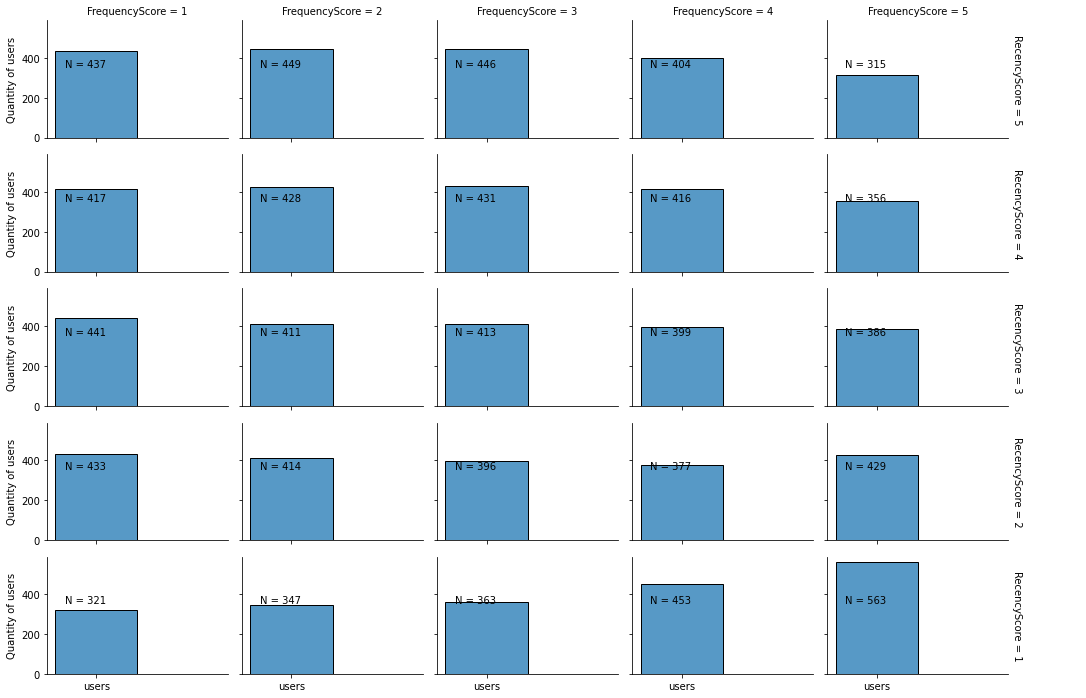

In [51]:
g = sns.FacetGrid(df_rfm, row="RecencyScore", col='FrequencyScore',height=2, aspect=1.5, margin_titles=True, despine=True, row_order=[5,4,3,2,1]) #aspect gives width
g.map_dataframe(sns.histplot, x = 'Users', binwidth=1, binrange=(0, 1))
#g.refline(y=df2["RecencyScore"].median())
def annotate(data, **kws): #Function for showing N
    n = len(data)
    ax = plt.gca()
    ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)
g.figure.subplots_adjust(wspace=0, hspace=0) #This gives the white spaces between plots
g.add_legend()
g.map_dataframe(annotate)
g.set_axis_labels("", 'Quantity of users')

In [ ]:

df_rfm['last day'] = df['date_added'].max()